In [69]:
#importacion de las bibliotecas

from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.model_selection import train_test_split 
from sklearn.tree import export_graphviz
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.tree as tree
from sklearn import tree
from pydotplus import graph_from_dot_data
from IPython.display import Image
from graphviz import render
from graphviz import Source



In [29]:
iris=load_iris()

In [30]:
#carga del dataset

dataSetCovid = pd.read_csv('covid.csv') 

In [31]:
#Mostrar el dataset cargado

dataSetCovid.head(20)

,date,country,new_cases,new_deaths,total_cases,total_deaths
0,2019-12-31,Afghanistan,0,0,0,0
1,2020-01-01,Afghanistan,0,0,0,0
2,2020-01-02,Afghanistan,0,0,0,0
3,2020-01-03,Afghanistan,0,0,0,0
4,2020-01-04,Afghanistan,0,0,0,0
5,2020-01-05,Afghanistan,0,0,0,0
6,2020-01-06,Afghanistan,0,0,0,0
7,2020-01-07,Afghanistan,0,0,0,0
8,2020-01-08,Afghanistan,0,0,0,0
9,2020-01-09,Afghanistan,0,0,0,0


In [32]:
dataSetCovid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7320 entries, 0 to 7319
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   date          7320 non-null   object
 1   country       7320 non-null   object
 2   new_cases     7320 non-null   int64 
 3   new_deaths    7320 non-null   int64 
 4   total_cases   7320 non-null   int64 
 5   total_deaths  7320 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 343.2+ KB


In [33]:
#Eliminar filas de registros con valores nulos

dataSetCovid.dropna(inplace=True)

In [34]:
#Seleccionar las columas de los datos

X =dataSetCovid.iloc[:,0 :6]
Y =dataSetCovid.iloc[:, -1]

In [35]:
#Convertir variables a numericas

X =pd.get_dummies(X)

In [36]:
#Dividir el conjunto de datos en datos de entrenamiento y datos de pruebas

X_train, X_test, Y_train, Y_test= train_test_split(iris.data,iris.target)


In [37]:
#Creacion del arbol de decision y entrenamiento con el conjunto de datos destinado para ello.

Arbol=DecisionTreeClassifier()


In [38]:
Arbol.fit(X_train,Y_train)

DecisionTreeClassifier()

In [39]:
#Evaluar el modelo con el conjunto de datos de prueba

score=Arbol.score(X_test,Y_test)
print("Accuracy: %.2f%%" %(score*100.0))


Accuracy: 94.74%


In [52]:
score=Arbol.score(X_train,Y_train)
print(score)

1.0


In [41]:
export_graphviz(Arbol,out_file='arbol.dot',class_names=iris.target_names,feature_names=iris.feature_names,filled=True)

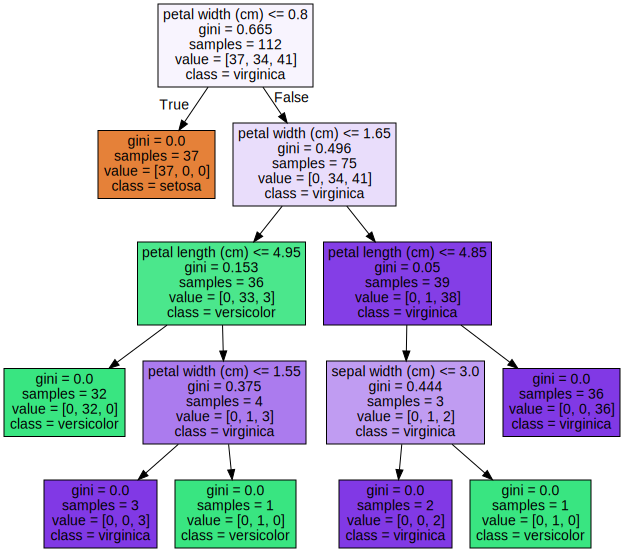

In [81]:
with open('arbol.dot') as f:
    dot_graph=f.read()
    graph= graphviz.Source(dot_graph)
        
#Convertir .dot a .png
from graphviz import render
render('dot', 'png', 'arbol.dot')    
    
from graphviz import Source
Source.from_file("arbol.dot")